# Problem: An advertising company wants to know who are the most profitable users for the company.

## Solution: We will be making a model predict profitable users for an advertising company.  with the help of this model company can easily find out profitable users and they will make the strategy to target new users

In [ ]:
# here we import some useful libraries for our project.
# numpy                    ==>   manage high-level mathematical functions.
# pandas                   ==>   data manipulation and analysis.
# seaborn and matplotlib   ==>   visually analysis
# warning                  ==>   hiding or ignore warning

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [186]:
# here we will load dataset file 

In [187]:
data = pd.read_csv("advertising.csv")

In [188]:
# here we are seeing the top five rows of the dataset by using the head function.

In [189]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [190]:
# here we are seeing the bottom five rows of the dataset by using the tail function.

In [191]:
data.tail()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
999,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


# Exploratory data analysis(EDA)

In [192]:
# here we are checking the dataset shape with help of shape

In [193]:
data.shape

(1000, 10)

In [194]:
# we are checking here missing values in each column and the sum of missing values in each column.
# with the help of isna()  and sum()

In [195]:
data.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [196]:
# here here we showing the column's name in the dataset.

In [197]:
data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [198]:
# here we showing the sum of every country.
# here we finding 237 unique countries.

In [199]:
data.Country.value_counts()

France                   9
Czech Republic           9
Australia                8
Afghanistan              8
Liberia                  8
                        ..
Saint Kitts and Nevis    1
Mozambique               1
Aruba                    1
Montserrat               1
Germany                  1
Name: Country, Length: 237, dtype: int64

In [200]:
# here we finding 969 unique cities.

In [201]:
data.City.value_counts()

Lisamouth          3
Williamsport       3
Lake David         2
New Jessicaport    2
Lake Jose          2
                  ..
Taylormouth        1
Hernandezville     1
Brandymouth        1
Aliciatown         1
Wademouth          1
Name: City, Length: 969, dtype: int64

In [202]:
# here we finding 1000 unique Timestamp.

In [203]:
data.Timestamp.value_counts()

2016-02-26 17:01:01    1
2016-05-25 00:19:57    1
2016-06-08 18:54:01    1
2016-03-23 06:00:15    1
2016-04-01 07:37:18    1
                      ..
2016-03-10 22:28:52    1
2016-01-18 02:51:13    1
2016-07-11 09:32:53    1
2016-01-30 16:15:29    1
2016-07-16 05:56:42    1
Name: Timestamp, Length: 1000, dtype: int64

In [204]:
# here we finding 100 unique Ad_Topic_Line.

In [205]:
data['Ad Topic Line'].value_counts()

Robust holistic application                  1
Switchable 3rdgeneration hub                 1
Organic well-modulated database              1
Reactive interactive protocol                1
Inverse local hub                            1
                                            ..
Extended grid-enabled hierarchy              1
Self-enabling incremental collaboration      1
Persevering needs-based open architecture    1
Robust responsive collaboration              1
Streamlined logistical secured line          1
Name: Ad Topic Line, Length: 1000, dtype: int64

In [206]:
# here we removing some columns beacuse they will effecting our model qualities that are not good for our model.

In [207]:
newdata =  data.drop(['Ad Topic Line','City','Country','Timestamp'],axis=1)
newdata.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


#  Visually Exploratory data analysis (EDA)

In [208]:
# here we trying to finding outlier error in "Daily Time Spent on Site" column by using histogram and boxplot.

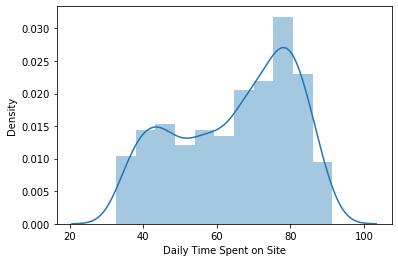

In [209]:
sns.distplot(newdata['Daily Time Spent on Site'])

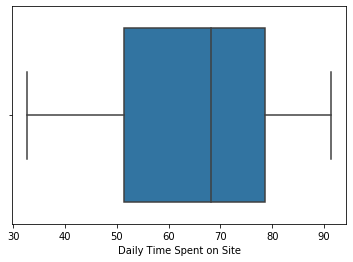

In [210]:
sns.boxplot(newdata["Daily Time Spent on Site"])

In [211]:
# If we got outlire error then we will using customize function that show below.
# The function name is outlinefree.

In [212]:
def outlinefree(dataCol):
    # sorting column
    sorted(dataCol)
    
    # getting percentile 25 and 27 that will help us for getting IQR (interquartile range)
    Q1,Q3 = np.percentile(dataCol,[25,75])
    
    # getting IQR (interquartile range)
    IQR = Q3-Q1
    
    # getting Lower range error
    LowerRange = Q1-(1.5 * IQR)
    
    # getting upper range error
    UpperRange = Q3+(1.5 * IQR)
    
    # return Lower range and upper range.
    return LowerRange,UpperRange

In [213]:
# here we using outlinerfree function for "Daily Time Spent on Site" column.
# getting lower range and upper range

In [214]:
Lowran,Upperran = outlinefree(newdata['Daily Time Spent on Site'])
print(Lowran,Upperran)

10.57875 119.32875


In [215]:
# here we applied lower range and upper range on "Daily Time Spent on Site" column.
# we find nothing mean outlier free column.

In [216]:
newdata[(newdata['Daily Time Spent on Site'] < Lowran) | (newdata['Daily Time Spent on Site'] > Upperran)]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad


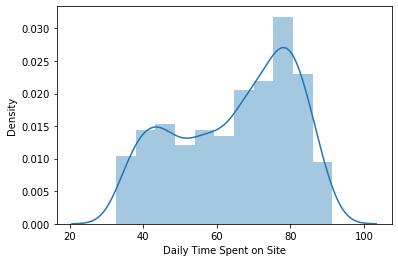

In [217]:
sns.distplot(newdata['Daily Time Spent on Site'])

In [218]:
# # here we trying to finding outlier error in "Age" column by using histogram and boxplot.

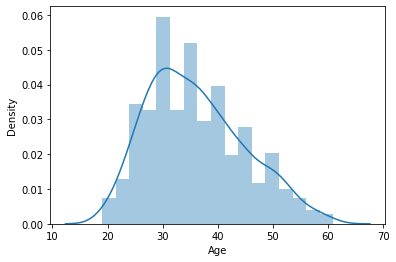

In [219]:
sns.distplot(newdata['Age'])

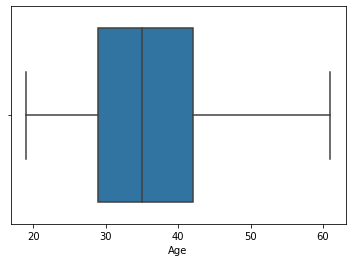

In [220]:
sns.boxplot(newdata['Age'])

In [221]:
# here we using outlinerfree function for "Age" column.
# getting lower range and upper range

In [222]:
Lowran,Upperran = outlinefree(newdata['Age'])
print(Lowran,Upperran)

9.5 61.5


In [223]:
# we find nothing (outlier free column)

In [224]:
newdata[(newdata['Age'] < Lowran) | (newdata['Age'] > Upperran)]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad


In [225]:
# here we trying to finding outlier error in "Area Income" column by using histogram and boxplot.

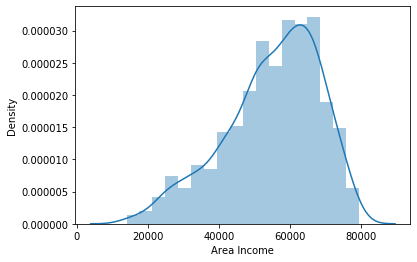

In [226]:
sns.distplot(newdata['Area Income'])

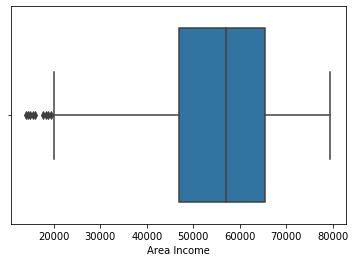

In [227]:
sns.boxplot(newdata["Area Income"])

In [228]:
# here we using outlinerfree function for "Area Income" column.
# getting lower range and upper range

In [234]:
Lowran,Upperran = outlinefree(newdata['Area Income'])
print(Lowran,Upperran)

19373.553749999992 93128.88375000001


In [235]:
# here we find nine rows are ouliteres.

In [236]:
newdata[(newdata['Area Income'] < Lowran) | (newdata['Area Income'] > Upperran)]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
135,49.89,39,17709.98,160.03,1,1
410,48.09,33,19345.36,180.42,0,1
510,57.86,30,18819.34,166.86,0,1
640,64.63,45,15598.29,158.80,1,1
665,58.05,32,15879.10,195.54,1,1
692,66.26,47,14548.06,179.04,1,1
768,68.58,41,13996.50,171.54,1,1
778,52.67,44,14775.50,191.26,0,1
952,62.79,36,18368.57,231.87,1,1


In [237]:
# here mean value of "area income" column

In [238]:
newdata['Area Income'].mean()

55000.00008000003

In [239]:
# here we replacing outlier into (Area Income) column mean value beacuse this column has contiune values.

In [240]:
newdata.iloc[[135,410,510,640,665,692,768,778,952],[2]] = 55000.00

In [241]:
# here we check outlier values replace with mean value or not?

In [242]:
newdata[(newdata['Area Income'] < Lowran) | (newdata['Area Income'] > Upperran)]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad


In [243]:
# here we get outlier free column "Area Income"

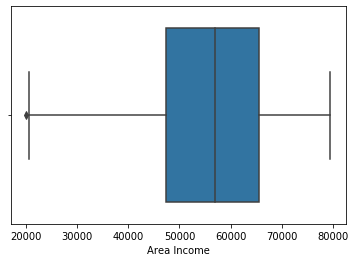

In [244]:
sns.boxplot(newdata['Area Income'])

In [245]:
# here we trying to finding outlier error in "Daily Internet Usage" column by using histogram and boxplot.

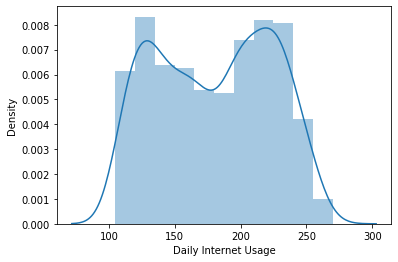

In [246]:
sns.distplot(newdata['Daily Internet Usage'])

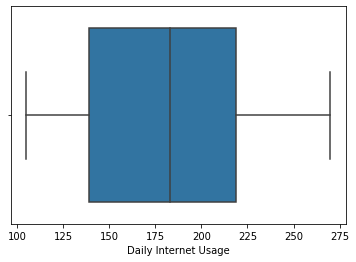

In [247]:
sns.boxplot(newdata['Daily Internet Usage'])

In [248]:
# here we trying to finding outlier error in "Male" column by using histogram and boxplot.

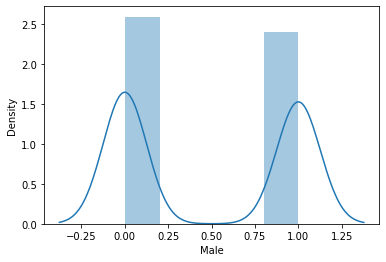

In [249]:
sns.distplot(newdata['Male'])

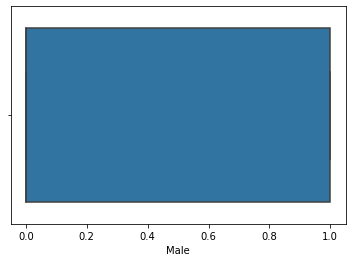

In [250]:
sns.boxplot(newdata['Male'])

# Completed Exploratory data analysis (EDA) processing

# Feature Selection

In [251]:
# here we using Correlation() for selecting columns.

In [252]:
newdata.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.313055,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.181416,-0.367209,-0.021044,0.492531
Area Income,0.313055,-0.181416,1.000000,0.351822,0.011849,-0.468313
Daily Internet Usage,0.518658,-0.367209,0.351822,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.011849,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.468313,-0.786539,-0.038027,1.000000


In [253]:
# here we getting two things.
# first this binary classification and second this balanced dataset.

In [254]:
newdata['Clicked on Ad'].value_counts()

1    500
0    500
Name: Clicked on Ad, dtype: int64

In [ ]:
# classification Rules
# 1. dataset should be numeric.
# 2. feature will be two-dimension and label will be One-dimension

In [255]:
features = newdata.iloc[:,[0,1,2,3,4]].values
label  = newdata.iloc[:,5].values

In [ ]:
# here we will split the dataset into four parts two for train and tests.

In [256]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(features,label,test_size=0.2,random_state=12)


In [258]:
from sklearn.linear_model import LogisticRegression

# here we creating the model for the prediction. 
Logi = LogisticRegression()
# here we giving training the model with a train set.
Logi.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# here we checking the accuracy of our model. 
# if the test value greater than the training value then model will ready to deploy otherwise we should optimize the model.

In [260]:
print("Training score: ",Logi.score(X_train,y_train))
print("Testing score: ",Logi.score(X_test,y_test))

Training score:  0.90125
Testing score:  0.885


In [ ]:
# rejected the model for deployment.

In [261]:
from sklearn.metrics import confusion_matrix
confusion_matrix(label,Logi.predict(features))

array([[462,  38],
       [ 64, 436]], dtype=int64)

In [262]:
from sklearn.metrics import classification_report
print(classification_report(label,Logi.predict(features)))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       500
           1       0.92      0.87      0.90       500

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



In [263]:
# here we optimizing the model with the help of change the random state number.

In [267]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

for i in range(700,900):
    X_train,X_test,y_train,y_test = train_test_split(features,label,test_size=0.2,random_state=i)
    
    Logimodel = LogisticRegression()
    Logimodel.fit(X_train,y_train)
    
    trainingscore = Logimodel.score(X_train,y_train)
    testingscore = Logimodel.score(X_test,y_test)
    
    if testingscore > trainingscore and testingscore > 0.97:
        print("test score: {} train score: {} seed : {}".format(testingscore,trainingscore,i))

In [ ]:
# here we got a good result

In [ ]:
test score: 0.99 train score: 0.965 seed : 233
     

In [268]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train,X_test,y_train,y_test = train_test_split(features,label,test_size=0.2,random_state=233)

Logimodel = LogisticRegression()
Logimodel.fit(X_train,y_train)

print("Training score : ",Logimodel.score(X_train,y_train))
print("Testing score : ",Logimodel.score(X_test,y_test))

Training score :  0.965
Testing score :  0.99


In [ ]:
# here we get good results now the model is ready for deployment.

In [269]:
from sklearn.metrics import confusion_matrix
confusion_matrix(label,Logimodel.predict(features))

array([[489,  11],
       [ 19, 481]], dtype=int64)

In [270]:
from sklearn.metrics import classification_report
print(classification_report(label,Logimodel.predict(features)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       500
           1       0.98      0.96      0.97       500

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



In [ ]:
# here we will be asking the client which error you can tolerate in the model.
# first, actually, zero but the model predicts one.
#                      or
# second, actually, one but the model predicts zero.
#                      and
# model threshold ===> 70%

In [ ]:
# the model is the pass for deployment on the client-server.